In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

In [12]:
#Randomly generate latitude and longitude numbers. lookup nearest city using citipy

# Empty series to hold all the names of cities and countries
randCity = []
randCountry = []
loopcnt = 0

#Loop through until at least 500 unique city names are found
while len(randCity) < 500 :
    # Loop counter to track number of loops made
    loopcnt +=1
    
    # Randomly generate latitude
    lat_pos = random.randint(0,2)
    base_lat = random.randint(0,91)
    dec_lat = random.random()/100
    lat = base_lat + dec_lat
    if lat_pos == 1:
        lat = lat * -1
    #print(f"The lattitude is: {lat}") 
    
    # Randomly generate longitude
    lng_pos = random.randint(0,2)
    base_lng = random.randint(0,181)
    dec_lng = random.random()/100
    lng = base_lng + dec_lng
    if lng_pos == 1:
        lng = lng * -1
    #print(f"The longitude is: {lng}") 
    
    # Call citipy file to get nearest city based on random lat and lng
    city = citipy.nearest_city(lat, lng)
    
    # Test to see if the random city is already in the list, if not, add it to the city and country lists
    foundCity = False
    for j in range(len(randCity)):
        if city.city_name == randCity[j]:
            foundCity = True
    if foundCity==False  :   
        randCity.append(city.city_name)
        randCountry.append(city.country_code)
        # If the city is unique, then add it to a our cities list
   

In [13]:
# Build query Url
base_url = "https://api.openweathermap.org/data/2.5/weather?"
api_key = api_key
units = "imperial"

query_url = base_url + "appid=" + api_key + "&units=" + units + "&q="

In [14]:
# Loop through the list of cities and perform request for data on each
search_data = []
cityList = []
countryList = []

searchCnt = 0
print("Begin API Call to OpenWeather Database ")
print("---------------------------------------")
for city in randCity:
    searchCnt += 1
    print(f"Processing record {searchCnt} for the city: {city}")   
    response = requests.get(query_url + city).json()
    searchCityID = response.get("id")
    if response.get("id"):
        print(f"     Record found for city: {city}    city id: {searchCityID}")
        search_data.append(response)
        cityList.append(city)
        countryList.append(randCountry[searchCnt-1])
    else:
        print(f"     No weather record found for city: {city}")
          
print("---------------------------------------")
print("Processing Complete")

Begin API Call to OpenWeather Database 
---------------------------------------
Processing record 1 for the city: punta arenas
     Record found for city: punta arenas    city id: 3874787
Processing record 2 for the city: asau
     No weather record found for city: asau
Processing record 3 for the city: tiksi
     Record found for city: tiksi    city id: 2015306
Processing record 4 for the city: ayagoz
     Record found for city: ayagoz    city id: 1525988
Processing record 5 for the city: bocicoiu mare
     Record found for city: bocicoiu mare    city id: 684496
Processing record 6 for the city: ushuaia
     Record found for city: ushuaia    city id: 3833367
Processing record 7 for the city: barreirinhas
     Record found for city: barreirinhas    city id: 3406196
Processing record 8 for the city: vaini
     Record found for city: vaini    city id: 1273574
Processing record 9 for the city: hobart
     Record found for city: hobart    city id: 2163355
Processing record 10 for the city:

     No weather record found for city: barentsburg
Processing record 83 for the city: port elizabeth
     Record found for city: port elizabeth    city id: 4501427
Processing record 84 for the city: skagastrond
     No weather record found for city: skagastrond
Processing record 85 for the city: nelson bay
     Record found for city: nelson bay    city id: 2155562
Processing record 86 for the city: vaitupu
     No weather record found for city: vaitupu
Processing record 87 for the city: tommot
     Record found for city: tommot    city id: 2015179
Processing record 88 for the city: ilulissat
     Record found for city: ilulissat    city id: 3423146
Processing record 89 for the city: birao
     Record found for city: birao    city id: 240210
Processing record 90 for the city: skalistyy
     No weather record found for city: skalistyy
Processing record 91 for the city: krasnoselkup
     No weather record found for city: krasnoselkup
Processing record 92 for the city: rundu
     Record fo

     Record found for city: crotone    city id: 2524881
Processing record 165 for the city: banjar
     Record found for city: banjar    city id: 1650233
Processing record 166 for the city: cockburn town
     Record found for city: cockburn town    city id: 3576994
Processing record 167 for the city: bathsheba
     Record found for city: bathsheba    city id: 3374083
Processing record 168 for the city: umzimvubu
     No weather record found for city: umzimvubu
Processing record 169 for the city: lorengau
     Record found for city: lorengau    city id: 2092164
Processing record 170 for the city: surt
     Record found for city: surt    city id: 2210554
Processing record 171 for the city: olafsvik
     No weather record found for city: olafsvik
Processing record 172 for the city: tambura
     No weather record found for city: tambura
Processing record 173 for the city: deputatskiy
     Record found for city: deputatskiy    city id: 2028164
Processing record 174 for the city: esperance
 

     Record found for city: quatre cocos    city id: 1106643
Processing record 247 for the city: vychegodskiy
     Record found for city: vychegodskiy    city id: 470530
Processing record 248 for the city: of
     No weather record found for city: of
Processing record 249 for the city: thompson
     Record found for city: thompson    city id: 6165406
Processing record 250 for the city: dunedin
     Record found for city: dunedin    city id: 2191562
Processing record 251 for the city: erhlin
     No weather record found for city: erhlin
Processing record 252 for the city: prince rupert
     Record found for city: prince rupert    city id: 6113406
Processing record 253 for the city: los llanos de aridane
     Record found for city: los llanos de aridane    city id: 2514651
Processing record 254 for the city: kutum
     Record found for city: kutum    city id: 371745
Processing record 255 for the city: sobolevo
     Record found for city: sobolevo    city id: 525426
Processing record 256 

     Record found for city: wanning    city id: 3220813
Processing record 328 for the city: kasempa
     Record found for city: kasempa    city id: 912628
Processing record 329 for the city: pampa
     Record found for city: pampa    city id: 5527953
Processing record 330 for the city: padang
     Record found for city: padang    city id: 1633419
Processing record 331 for the city: benghazi
     Record found for city: benghazi    city id: 88319
Processing record 332 for the city: cheuskiny
     No weather record found for city: cheuskiny
Processing record 333 for the city: kurmanayevka
     Record found for city: kurmanayevka    city id: 538685
Processing record 334 for the city: pindi gheb
     Record found for city: pindi gheb    city id: 1168015
Processing record 335 for the city: lardos
     Record found for city: lardos    city id: 408689
Processing record 336 for the city: arkhipo-osipovka
     Record found for city: arkhipo-osipovka    city id: 580969
Processing record 337 for t

     Record found for city: alofi    city id: 4036284
Processing record 410 for the city: fatehpur
     Record found for city: fatehpur    city id: 1179305
Processing record 411 for the city: hovd
     Record found for city: hovd    city id: 7626384
Processing record 412 for the city: faanui
     Record found for city: faanui    city id: 4034551
Processing record 413 for the city: yenagoa
     Record found for city: yenagoa    city id: 2318123
Processing record 414 for the city: siirt
     Record found for city: siirt    city id: 300822
Processing record 415 for the city: port-gentil
     Record found for city: port-gentil    city id: 2396518
Processing record 416 for the city: qasigiannguit
     Record found for city: qasigiannguit    city id: 3420768
Processing record 417 for the city: pevek
     Record found for city: pevek    city id: 2122090
Processing record 418 for the city: pangody
     Record found for city: pangody    city id: 1495626
Processing record 419 for the city: vanim

     Record found for city: shizilu    city id: 1784461
Processing record 492 for the city: bolungarvik
     No weather record found for city: bolungarvik
Processing record 493 for the city: wladyslawowo
     Record found for city: wladyslawowo    city id: 3081752
Processing record 494 for the city: chubbuck
     Record found for city: chubbuck    city id: 5588842
Processing record 495 for the city: villazon
     No weather record found for city: villazon
Processing record 496 for the city: taiobeiras
     Record found for city: taiobeiras    city id: 3447059
Processing record 497 for the city: bonthe
     Record found for city: bonthe    city id: 2409914
Processing record 498 for the city: kamenskoye
     No weather record found for city: kamenskoye
Processing record 499 for the city: gazli
     Record found for city: gazli    city id: 1513990
Processing record 500 for the city: nisia floresta
     Record found for city: nisia floresta    city id: 3393922
-----------------------------

In [15]:
#print(json.dumps(search_data[2], indent=4))
len(search_data)

439

In [16]:
# Use list comprehension to gather necessary data series

lat_data = [data.get("coord").get("lat") for data in search_data]
lng_data = [data.get("coord").get("lon") for data in search_data]
temp_data = [data.get("main").get("temp") for data in search_data]
humid_data = [data.get("main").get("humidity") for data in search_data]
cloud_data =[data.get("clouds").get("all") for data in search_data]
wind_data = [data.get("wind").get("speed") for data in search_data]

In [32]:
# Create data frame with aggregated data
weather_data = pd.DataFrame({"cityName":cityList,
                            "country":countryList,
                            "lat":lat_data,
                            "lng":lng_data,
                            "temp":temp_data,
                            "humidity":humid_data,
                            "cloudiness":cloud_data,
                            "winds":wind_data})


In [18]:
# Force column order
weather_data = weather_data[["cityName","country","lat","lng","temp","humidity","cloudiness","winds"]]
weather_data.head()

,cityName,country,lat,lng,temp,humidity,cloudiness,winds
0,punta arenas,cl,-53.16,-70.91,39.15,76,40,10.29
1,tiksi,ru,71.64,128.87,39.19,81,92,4.85
2,ayagoz,kz,47.96,80.43,68.17,46,68,10.38
3,bocicoiu mare,ro,47.96,24.01,69.93,56,33,4.70
4,ushuaia,ar,-54.81,-68.31,39.97,56,40,20.80


In [30]:
# Save weather data to csv file
weather_data.to_csv("weatherdata.csv", encoding="utf-8", index=False)


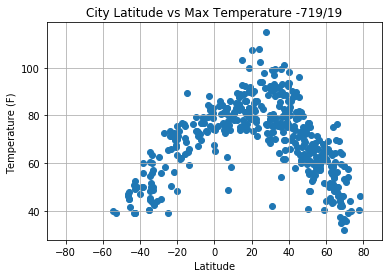

In [26]:
# Build a scatter plot for each data type

# Latitude vs Max Temp
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o")

# Add chart labels
plt.title("City Latitude vs Max Temperature -719/19")
plt.ylabel("Temperature (F) ")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("Lat_vs_MaxTemp.png")
# Show plot
plt.show()

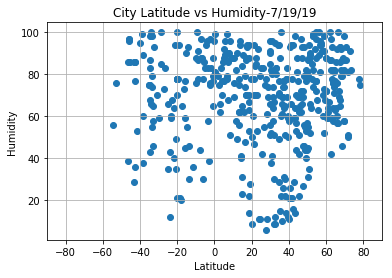

In [27]:
# Latitude vs Humidity
plt.scatter(weather_data["lat"], weather_data["humidity"], marker="o")

# Add chart labels
plt.title("City Latitude vs Humidity-7/19/19")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("Lat_vs_Humidity.png")

# Show plot
plt.show()

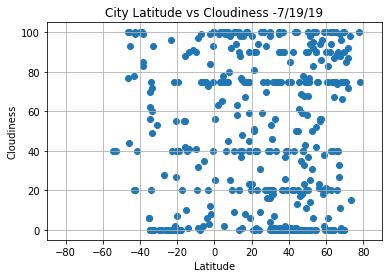

In [25]:
# Latitude vs Cloudiness
plt.scatter(weather_data["lat"], weather_data["cloudiness"], marker="o")

# Add chart labels
plt.title("City Latitude vs Cloudiness -7/19/19")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("Lat_vs_Cloudiness.png")

# Show plot
plt.show()

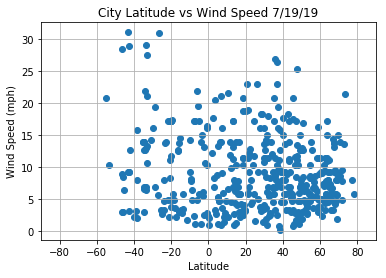

In [24]:
# Latitude vs Wind Speed
plt.scatter(weather_data["lat"], weather_data["winds"], marker="o")

# Add chart labels
plt.title("City Latitude vs Wind Speed 7/19/19")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("Lat_vs_WindSpeed.png")

# Show plot
plt.show()